[DIY Covid-19 Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash) (C) Fabrizio Smeraldi, 2020 ([f.smeraldi@qmul.ac.uk](mailto:f.smeraldi@qmul.ac.uk) - [web](http://www.eecs.qmul.ac.uk/~fabri/)). All rights reserved.

# DIY Covid-19 Dashboard

This is a template for your DIY Covid Dashboard, to which you can add the code you developed in the previous notebooks. The dashboard will be displayed using [voila](https://voila.readthedocs.io/en/stable/index.html), a Python dashboarding tool that converts notebooks to standalone dashboards. Contrary to the other libraries we have seen, the ```voila``` package must be installed using *pip* or *conda* but it does not need to be imported - it rather acts at the level of the notebook server. Package ```voila``` is already installed on the EECS JupyterHub as well as in the binder - to install it locally, follow the [instructions](https://voila.readthedocs.io/en/stable/install.html) online.

Broadly speaking, Voila acts by **running all the cells in your notebook** when the dashboard is first loaded; it then hides all code cells and displays all markdown cells and any outputs, including widgets. However, the code is still there in the background and handles any interaction with the widgets. To view this dashboard template rendered in Voila click [here](https://mybinder.org/v2/gh/fsmeraldi/diy-covid19dash/main?urlpath=%2Fvoila%2Frender%2FDashboard.ipynb).

In [2]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [5]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100
# list which specifies the metrics, overview data for UK
filters = [
    'areaType=overview' # note each metric-value pair is inside one string
]
# values here are the names of the PHE metrics, dictionary specifying data fields requested
structure = {
    "date": "date",
    "cases": "newCasesByPublishDate",
    "hospital": "newAdmissions",
    "deaths": "cumDeaths28DaysByDeathDateRate"    
}
# Instantiate, using filters and structure to initialise COVID19API object
api = Cov19API(filters=filters, structure=structure)
# Extract data using .get_json method
timeseries=api.get_json()
# Print value specified above
print(timeseries)
# Saving API query data in .json format
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

{'data': [{'date': '2021-12-09', 'cases': 50867, 'hospital': None, 'deaths': None}, {'date': '2021-12-08', 'cases': 51342, 'hospital': None, 'deaths': 217.8}, {'date': '2021-12-07', 'cases': 45691, 'hospital': None, 'deaths': 217.8}, {'date': '2021-12-06', 'cases': 51459, 'hospital': None, 'deaths': 217.7}, {'date': '2021-12-05', 'cases': 43992, 'hospital': 813, 'deaths': 217.6}, {'date': '2021-12-04', 'cases': 42848, 'hospital': 737, 'deaths': 217.4}, {'date': '2021-12-03', 'cases': 50584, 'hospital': 718, 'deaths': 217.2}, {'date': '2021-12-02', 'cases': 53945, 'hospital': 822, 'deaths': 217.1}, {'date': '2021-12-01', 'cases': 48374, 'hospital': 809, 'deaths': 216.9}, {'date': '2021-11-30', 'cases': 39716, 'hospital': 812, 'deaths': 216.8}, {'date': '2021-11-29', 'cases': 42583, 'hospital': 794, 'deaths': 216.6}, {'date': '2021-11-28', 'cases': 37681, 'hospital': 705, 'deaths': 216.5}, {'date': '2021-11-27', 'cases': 39567, 'hospital': 708, 'deaths': 216.3}, {'date': '2021-11-26', 'c

## Load initial data from disk

You should include "canned" data in ```.json``` files along with your dashboard. When the dashboard starts, it should load that data (the code below will be hidden when the dashboard is rendered by Voila).

In [10]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
jsondata={}
# Load raw data from JSON file it was saved in
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)
data

{'data': [{'date': '2021-12-09',
   'cases': 50867,
   'hospital': None,
   'deaths': None},
  {'date': '2021-12-08', 'cases': 51342, 'hospital': None, 'deaths': 217.8},
  {'date': '2021-12-07', 'cases': 45691, 'hospital': None, 'deaths': 217.8},
  {'date': '2021-12-06', 'cases': 51459, 'hospital': None, 'deaths': 217.7},
  {'date': '2021-12-05', 'cases': 43992, 'hospital': 813, 'deaths': 217.6},
  {'date': '2021-12-04', 'cases': 42848, 'hospital': 737, 'deaths': 217.4},
  {'date': '2021-12-03', 'cases': 50584, 'hospital': 718, 'deaths': 217.2},
  {'date': '2021-12-02', 'cases': 53945, 'hospital': 822, 'deaths': 217.1},
  {'date': '2021-12-01', 'cases': 48374, 'hospital': 809, 'deaths': 216.9},
  {'date': '2021-11-30', 'cases': 39716, 'hospital': 812, 'deaths': 216.8},
  {'date': '2021-11-29', 'cases': 42583, 'hospital': 794, 'deaths': 216.6},
  {'date': '2021-11-28', 'cases': 37681, 'hospital': 705, 'deaths': 216.5},
  {'date': '2021-11-27', 'cases': 39567, 'hospital': 708, 'deaths': 

## Wrangle the data

The dashboard should contain the logic to wrangle the raw data into a ```DataFrame``` (or more than one, as required) that will be used for plotting. The wrangling code should be put into a function and called on the data from the JSON file (we'll need to call it again on any data downloaded from the API).  In this template, we just pretend we are wrangling ```rawdata``` and generate a dataframe with some random data

2020-01-31 00:00:00  to  2021-12-09 00:00:00


<AxesSubplot:>

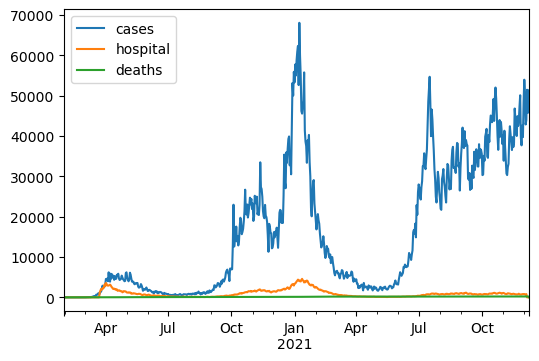

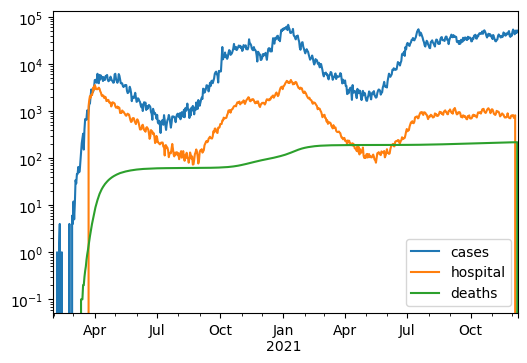

In [33]:


def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
    df=pd.DataFrame(index=range(0,100), columns=['One', 'Two'])
    # we have no real data to wrangle, so we just generate two random walks.
    one=two=0.0
    for i in range(0,100):
        df.loc[i,'One']=one
        df.loc[i,'Two']=two
        one+=np.random.randn()
        two+=2*np.random.randn()
    return df

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in the cell as below:
df=wrangle_data(jsondata) # df is the dataframe for plotting
# Retrieve dictionary containing data stored as a list
datalist=data['data']
datalist
# Extract and sort all dates
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates
# Locate earliest and latest dates, converted into Pandas type
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)
# Define DataFrame by specifying index and column titles, alongside creating index of date_range
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases', 'hospital', 'deaths'])
timeseriesdf
# Fill DataFrame with values from statistics
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf
# Call plot method on DataFrame - calls matplot.pyplot function to create plot of data
timeseriesdf.plot() 
#Logarithm scale used to plot this exponential phenemona. Exponential propogation becomes a straight line.
timeseriesdf.plot(logy=True) 

## Download current data

Give your users an option to refresh the dataset - a "refresh" button will do. The button callback should
* call the code that accesses the API and download some fresh raw data;
* wrangle that data into a dataframe and update the corresponding (global) variable for plotting;
* optionally: force a redraw of the graph and give the user some fredback.

Once you get it to work, you may want to wrap your API call inside an exception handler, so that the user is informed, the "canned" data are not overwritten and nothing crashes if for any reason the server cannot be reached or data are not available.

After you refresh the data, graphs will not update until the user interacts with a widget. You can trick ```iPywidgets``` into redrawing the graph by simulating interaction, as in the ```refresh_graph``` function we define in the Graph and Analysis section below.

Clicking on the button below just generates some more random data and refreshes the graph. The button should read *Fetch Data*. If you see anything else, take a deep breath :)

In [34]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api():
    apibutton.icon="check"
    apibutton.disabled=True
    
apibutton=wdg.Button(
    description='Refresh Data', # Button Descriptor
    disabled=False,
    button_style='success', # Green 'success' button style 
    tooltip='Click to download current PHE data',
    icon='eye' # FontAwesome icon - eye, to represent a view
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets/ draws button on notebook
display(apibutton)


Button(button_style='success', description='Refresh Data', icon='eye', style=ButtonStyle(), tooltip='Click to …

In [35]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='Refresh', # Button description
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='exclamation-triangle'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button


Button(button_style='info', description='Refresh', icon='exclamation-triangle', style=ButtonStyle(), tooltip='…

## Graphs and Analysis

Include at least one graph with interactive controls, as well as some instructions for the user and/or comments on what the graph represents and how it should be explored (this example shows two random walks)

In [36]:
def plot_random_walk(walk):
    df[walk].plot()
    plt.show() # important! update won't work properly without this
    
whichwalk=wdg.Dropdown(
    options=['One', 'Two'],
    value='One',
    description='Walk no: ',
    disabled=False,
)

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=whichwalk.value
    if current==whichwalk.options[0]:
        other=whichwalk.options[1]
    else:
        other=whichwalk.options[0]
    whichwalk.value=other # forces the redraw
    whichwalk.value=current # now we can change it back
    
    
graph=wdg.interactive_output(plot_random_walk, {'walk': whichwalk})
    
display(whichwalk, graph)
# Select stats to be displayed 
series=wdg.SelectMultiple(
    options=['cases', 'hospital', 'deaths'],
    value=['cases', 'hospital', 'deaths'],
    rows=3,
    description='Stats:',
    disabled=False
)
# Choice between linear and logarithmic scale
scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])
# Callback function accepting tuple of stats from SelectMultiple & a boolean value from RadioButtons
def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

# stack series and scale on top of each other
ctrls=wdg.VBox([series, scale])
# put the graph and the controls side by side
form=wdg.HBox([graph, ctrls]) # Container widget HBox, used to group and arrange other widgets on the interface.

# Now form contains the entire interface
display(form)

Dropdown(description='Walk no: ', options=('One', 'Two'), value='One')

Output()

Output()

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*